In [1]:
# Check GPU type
!nvidia-smi

Wed Aug 24 14:10:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### KERAS TRANSFER LEARNING WITH LEAF PROJECT

In [8]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Change current directory to Google Drive
%cd /content/drive/MyDrive/

/content/drive/MyDrive


### Dataset operations

In [12]:
# Install zip and unzip
!apt-get install -y zip unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [10]:
!mkdir -p /root/WORKSPACE

In [11]:
# Copy Zips into Workspace
!cp /content/drive/MyDrive/Datasets/combined_train.zip /root/WORKSPACE
!cp /content/drive/MyDrive/Datasets/combined_valid.zip /root/WORKSPACE

In [13]:
!unzip /root/WORKSPACE/combined_train.zip
!unzip /root/WORKSPACE/combined_valid.zip

Streaming output truncated to the last 5000 lines.
  inflating: root/WORKSPACE/tomamto_op/combined_train/mosaic_virus1484_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/leaf_mold985_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/spider_mite994_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/mosaic_virus614_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/late_blight1510_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/late_blight691_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/leaf_mold1292_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/curl_virus640_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/bacterial_spot1537_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/early_blight845_crp_strc.jpg  
  inflating: root/WORKSPACE/tomamto_op/combined_train/spider_mite778_crp_strc.jpg  
  inflating: root/WO

In [19]:
!mkdir -p /root/WORKSPACE/whole_dataset
!mv -v root/WORKSPACE/tomamto_op/combined_train/* /root/WORKSPACE/whole_dataset/
!mv -v root/WORKSPACE/tomamto_op/combined_valid/* /root/WORKSPACE/whole_dataset/

Streaming output truncated to the last 5000 lines.
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight28_crp_strc.jpg' -> '/root/WORKSPACE/whole_dataset/late_blight28_crp_strc.jpg'
removed 'root/WORKSPACE/tomamto_op/combined_valid/late_blight28_crp_strc.jpg'
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight290_crp_strc.jpg' -> '/root/WORKSPACE/whole_dataset/late_blight290_crp_strc.jpg'
removed 'root/WORKSPACE/tomamto_op/combined_valid/late_blight290_crp_strc.jpg'
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight291_crp_strc.jpg' -> '/root/WORKSPACE/whole_dataset/late_blight291_crp_strc.jpg'
removed 'root/WORKSPACE/tomamto_op/combined_valid/late_blight291_crp_strc.jpg'
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight292_crp_strc.jpg' -> '/root/WORKSPACE/whole_dataset/late_blight292_crp_strc.jpg'
removed 'root/WORKSPACE/tomamto_op/combined_valid/late_blight292_crp_strc.jpg'
copied 'root/WORKSPACE/tomamto_op/combined_valid/late_blight293_crp_strc

In [21]:
# Rezip
%cd /root/WORKSPACE/whole_dataset/
!zip -r /root/whole_dataset.zip . *
%cd -

Streaming output truncated to the last 5000 lines.
  adding: mosaic_virus990_crp_strc.jpg (deflated 1%)
  adding: early_blight1118_crp_strc.jpg (deflated 3%)
  adding: curl_virus327_crp_strc.jpg (deflated 2%)
  adding: early_blight358_crp_strc.jpg (deflated 2%)
  adding: septoeia_leaf_spot1579_crp_strc.jpg (deflated 1%)
  adding: early_blight770_crp_strc.jpg (deflated 3%)
  adding: septoeia_leaf_spot819_crp_strc.jpg (deflated 2%)
  adding: late_blight285_crp_strc.jpg (deflated 3%)
  adding: early_blight692_crp_strc.jpg (deflated 2%)
  adding: mosaic_virus612_crp_strc.jpg (deflated 2%)
  adding: healty880_crp_strc.jpg (deflated 2%)
  adding: leaf_mold1300_crp_strc.jpg (deflated 5%)
  adding: target_spot655_crp_strc.jpg (deflated 2%)
  adding: bacterial_spot547_crp_strc.jpg (deflated 3%)
  adding: leaf_mold1428_crp_strc.jpg (deflated 4%)
  adding: late_blight214_crp_strc.jpg (deflated 2%)
  adding: curl_virus956_crp_strc.jpg (deflated 4%)
  adding: early_blight72_crp_strc.jpg (deflated 2

In [24]:
!cp /root/whole_dataset.zip Datasets/

In [26]:
!mv /Datasets/whole_dataset.zip /Datasets/test/xd.zip

mv: cannot stat '/Datasets/whole_dataset.zip': No such file or directory


In [28]:
%cd Datasets

/content/drive/MyDrive/Datasets


In [31]:
!ls

combined_train.zip  combined_valid.zip	tomato.zip  whole_dataset.zip


### DATASET TEST

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

In [3]:
dataset_url = "https://transfer.sh/YwG6Wf/tomato_dataset.tgz"

In [4]:
data_dir = tf.keras.utils.get_file('tomato_dataset', origin=dataset_url, untar=True)

231702528/231691341 [==============================] - 42s 0us/step


In [5]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/tomato_dataset')

In [7]:
# Delete Spotlight Indecies
%cd /root/.keras/datasets/tomato_dataset/
!find . -name '._*' -type f -delete
%cd -

/root/.keras/datasets/tomato_dataset
/content


In [8]:
# Delete Spotlight Indecies
%cd /root/.keras/datasets/tomato_dataset/
!find . -name '.DS_*' -type f -delete
%cd -

/root/.keras/datasets/tomato_dataset
/content


In [15]:
!ls -la /root/.keras/datasets/tomato_dataset/


total 2108
drwxr-xr-x 12  501 staff   4096 Aug 24 14:12 .
drwxr-xr-x  3 root root    4096 Aug 24 14:11 ..
drwxr-xr-x  2  501 staff 204800 Aug 24 14:12 bacterial_spot
drwxr-xr-x  2  501 staff 212992 Aug 24 14:12 curl_virus
drwxr-xr-x  2  501 staff 233472 Aug 24 14:12 early_blight
drwxr-xr-x  2  501 staff 188416 Aug 24 14:12 healty
drwxr-xr-x  2  501 staff 208896 Aug 24 14:12 late_blight
drwxr-xr-x  2  501 staff 196608 Aug 24 14:12 leaf_mold
drwxr-xr-x  2  501 staff 208896 Aug 24 14:12 mosaic_virus
drwxr-xr-x  2  501 staff 225280 Aug 24 14:12 septoria_leaf_spot
drwxr-xr-x  2  501 staff 258048 Aug 24 14:12 spider_mite
drwxr-xr-x  2  501 staff 212992 Aug 24 14:12 target_spot


In [21]:
img_height, img_width=256, 256
b_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=b_size)

Found 18748 files belonging to 10 classes.
Using 14999 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  batch_size=b_size)

Found 18748 files belonging to 10 classes.
Using 3749 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['bacterial_spot', 'curl_virus', 'early_blight', 'healty', 'late_blight', 'leaf_mold', 'mosaic_virus', 'septoria_leaf_spot', 'spider_mite', 'target_spot']


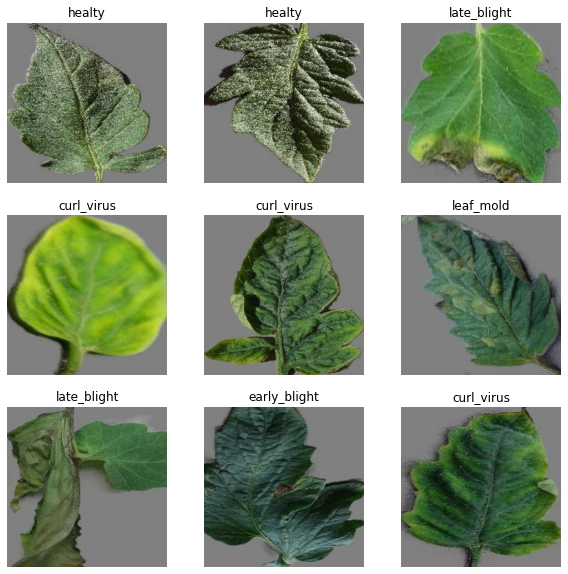

In [27]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = class_names[labels[i].numpy().astype('uint8').tolist().index(1)]
        plt.title(title)
        plt.axis("off")

In [28]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=10,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 0s 0us/step


In [29]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

In [30]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [36]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


469/469 [==============================] - 84s 170ms/step - loss: 0.0394 - accuracy: 0.9864 - val_loss: 0.2750 - val_accuracy: 0.9336
Epoch 2/5
469/469 [==============================] - 79s 168ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.2354 - val_accuracy: 0.9405
Epoch 3/5
469/469 [==============================] - 79s 168ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.1756 - val_accuracy: 0.9539
Epoch 4/5
469/469 [==============================] - 79s 168ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.3116 - val_accuracy: 0.9282
Epoch 5/5
469/469 [==============================] - 79s 168ms/step - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.1978 - val_accuracy: 0.9525


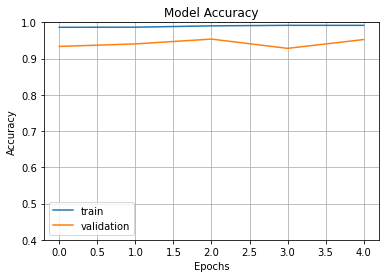

In [38]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [37]:
resnet_model.save('/root/model_five.h5')

In [41]:
!ls -lh /root/

total 205M
-rw-r--r-- 1 root root 103M Aug 24 14:58 model_five.h5
drwxr-xr-x 4 root root 4.0K Aug 24 14:47 model_ten
-rw-r--r-- 1 root root 103M Aug 24 14:48 model_ten.h5
